## Transportation method from Ireland - CA1 Strategic Thinking - Team 6


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
datauno = pd.read_csv('HTA14.20220403T120429.csv')

In [3]:
datauno.head()

,Statistic,Year,Country and Region Visited,UNIT,VALUE
0,Number of Trips by Irish Residents on Outbound...,2010,Austria,Thousand,76
1,Number of Trips by Irish Residents on Outbound...,2010,Belgium,Thousand,65
2,Number of Trips by Irish Residents on Outbound...,2010,Germany,Thousand,219
3,Number of Trips by Irish Residents on Outbound...,2010,Spain,Thousand,1371
4,Number of Trips by Irish Residents on Outbound...,2010,France,Thousand,635


In [4]:
#Check what values are in the columns to either encode or remove if irrelevant 
print(datauno['UNIT'].unique())

['Thousand']


Since the data from the 'VALUE' column is merely a reference to the measure we will drop it as further down we will standardise this references and hence it results irrelevant

In [5]:
a = datauno.pop('UNIT')
print (a)

0      Thousand
1      Thousand
2      Thousand
3      Thousand
4      Thousand
         ...   
125    Thousand
126    Thousand
127    Thousand
128    Thousand
129    Thousand
Name: UNIT, Length: 130, dtype: object


In [6]:
datauno.head()

,Statistic,Year,Country and Region Visited,VALUE
0,Number of Trips by Irish Residents on Outbound...,2010,Austria,76
1,Number of Trips by Irish Residents on Outbound...,2010,Belgium,65
2,Number of Trips by Irish Residents on Outbound...,2010,Germany,219
3,Number of Trips by Irish Residents on Outbound...,2010,Spain,1371
4,Number of Trips by Irish Residents on Outbound...,2010,France,635


We are doing the same with 'Statistic' as it refers to the number of trips outbound, we will rename the value column and drop the referencial one as follows:

In [7]:
print(datauno['Statistic'].unique())

['Number of Trips by Irish Residents on Outbound Travel Travel']


In [8]:
datauno.rename(columns={"VALUE":"total trips"} ,inplace=True)

In [9]:
datauno.head()

,Statistic,Year,Country and Region Visited,total trips
0,Number of Trips by Irish Residents on Outbound...,2010,Austria,76
1,Number of Trips by Irish Residents on Outbound...,2010,Belgium,65
2,Number of Trips by Irish Residents on Outbound...,2010,Germany,219
3,Number of Trips by Irish Residents on Outbound...,2010,Spain,1371
4,Number of Trips by Irish Residents on Outbound...,2010,France,635


In [10]:
b = datauno.pop('Statistic')
print (b)

0      Number of Trips by Irish Residents on Outbound...
1      Number of Trips by Irish Residents on Outbound...
2      Number of Trips by Irish Residents on Outbound...
3      Number of Trips by Irish Residents on Outbound...
4      Number of Trips by Irish Residents on Outbound...
                             ...                        
125    Number of Trips by Irish Residents on Outbound...
126    Number of Trips by Irish Residents on Outbound...
127    Number of Trips by Irish Residents on Outbound...
128    Number of Trips by Irish Residents on Outbound...
129    Number of Trips by Irish Residents on Outbound...
Name: Statistic, Length: 130, dtype: object


Finally we have our first dataset organised and we can analyse the number of trips to the regions per year

In [11]:
datauno.head()

,Year,Country and Region Visited,total trips
0,2010,Austria,76
1,2010,Belgium,65
2,2010,Germany,219
3,2010,Spain,1371
4,2010,France,635


In [12]:
datauno.rename(columns={"Country and Region Visited":"Region Visited"} ,inplace=True)

In [13]:
datauno.head()

,Year,Region Visited,total trips
0,2010,Austria,76
1,2010,Belgium,65
2,2010,Germany,219
3,2010,Spain,1371
4,2010,France,635


In [14]:
datauno['total trips'].nlargest(n=10)

122    3059
109    2728
96     2597
83     2463
44     2407
57     2355
5      2343
18     2304
127    2304
70     2269
Name: total trips, dtype: int64

In [15]:
datauno = datauno.nlargest(n=100, columns=['total trips'])

In [16]:
datauno.head()

,Year,Region Visited,total trips
122,2019,United Kingdom (includes Great Britain & North...,3059
109,2018,United Kingdom (includes Great Britain & North...,2728
96,2017,United Kingdom (includes Great Britain & North...,2597
83,2016,United Kingdom (includes Great Britain & North...,2463
44,2013,United Kingdom (includes Great Britain & North...,2407


<AxesSubplot:xlabel='count', ylabel='Region Visited'>

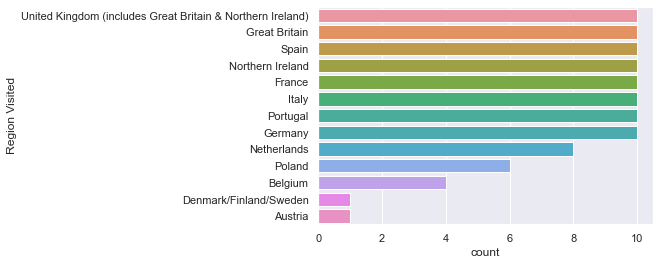

In [17]:
sns.countplot(y='Region Visited', data=datauno.iloc[0:100])  

In [18]:
datauno.drop(datauno.index[(datauno["Region Visited"] == 'Great Britain')],axis=0,inplace=True)

In [19]:
datauno.drop(datauno.index[(datauno["Region Visited"] == 'Northern Ireland')],axis=0,inplace=True)

<AxesSubplot:xlabel='count', ylabel='Region Visited'>

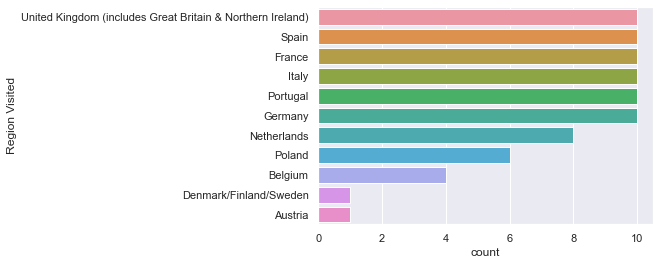

In [20]:
sns.countplot(y='Region Visited', data=datauno.iloc[0:100])  

In [21]:
datauno.shape

(80, 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total trips', ylabel='Density'>

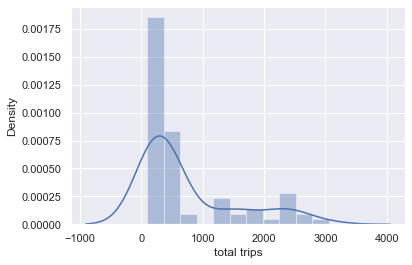

In [22]:
sns.distplot(datauno['total trips'])

In [23]:
datados = pd.read_csv('TRBA1.20220403T120445.csv')

In [24]:
datados.head()

,Statistic,Year,Passenger Direction,Travel Mode,UNIT,VALUE
0,International Movement of Passengers,1993,Departing Eire,Air,Number,3569016
1,International Movement of Passengers,1993,Departing Eire,Sea,Number,1909188
2,International Movement of Passengers,1994,Departing Eire,Air,Number,4169901
3,International Movement of Passengers,1994,Departing Eire,Sea,Number,1998442
4,International Movement of Passengers,1995,Departing Eire,Air,Number,4823842


In [25]:
print(datados['Statistic'].unique())

['International Movement of Passengers']


In [26]:
print(datados['UNIT'].unique())

['Number']


In [27]:
datados = datados.drop(['Statistic', 'Passenger Direction', 'UNIT'], axis=1)

In [28]:
datados.rename(columns={"VALUE":"Total Passengers"} ,inplace=True)

In [29]:
datados.head()

,Year,Travel Mode,Total Passengers
0,1993,Air,3569016
1,1993,Sea,1909188
2,1994,Air,4169901
3,1994,Sea,1998442
4,1995,Air,4823842


In [30]:
datados = datados.nlargest(n=100, columns=['Total Passengers'])

In [31]:
datados.head()

,Year,Travel Mode,Total Passengers
30,2008,Air,14659971
28,2007,Air,14584234
32,2009,Air,12874667
26,2006,Air,12812284
38,2012,Air,11839699


In [32]:
datados.shape

(40, 3)

<AxesSubplot:xlabel='count', ylabel='Travel Mode'>

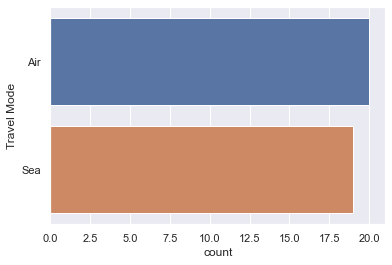

In [33]:
sns.countplot(y='Travel Mode', data=datados.iloc[:-1])  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Passengers', ylabel='Density'>

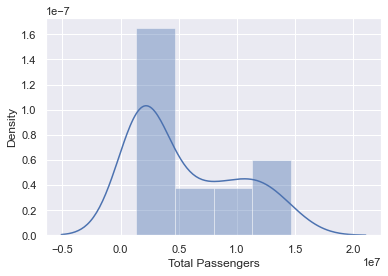

In [34]:
sns.distplot(datados['Total Passengers'])

In [35]:
from sklearn.preprocessing import LabelEncoder
Travel_Mode= LabelEncoder()
datados['Travel Mode'] = Travel_Mode.fit_transform(datados['Travel Mode'])

In [36]:
print(datados['Travel Mode'].unique())

[0 1]


In [37]:
datados.head()

,Year,Travel Mode,Total Passengers
30,2008,0,14659971
28,2007,0,14584234
32,2009,0,12874667
26,2006,0,12812284
38,2012,0,11839699


In [38]:
X = datados.iloc[:, :-1].values
y = datados.iloc[:, -1].values

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2) 
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[   46314.29  2260447.  ]
 [  309352.94  2421003.  ]
 [ -479763.01  2130747.  ]
 [11950624.39 11839699.  ]
 [ 9320237.88  9035676.  ]
 [ 8005044.63  6104802.  ]
 [ 1624546.2   2036287.  ]
 [ 9057199.23  8535752.  ]]


In [42]:
print('The precision of the model is ')
print(regressor.score(X_train, y_train))

The precision of the model is 
0.8058905344087979


In [43]:
print(regressor.predict([[2023,1]]))

[6885319.22]


In [44]:
print(regressor.predict([[2023,0]]))

[14844049.55]


In [45]:
datacuatro = pd.read_csv('TMA11.20220403T120409.csv')

In [46]:
datacuatro.head()

,Statistic,Year,Type of Expenditure,UNIT,VALUE
0,Estimated Expenditure by Irish Residents on Ov...,2009,Fare payments by Irish residents abroad to Iri...,Euro Million,570
1,Estimated Expenditure by Irish Residents on Ov...,2010,Fare payments by Irish residents abroad to Iri...,Euro Million,590
2,Estimated Expenditure by Irish Residents on Ov...,2011,Fare payments by Irish residents abroad to Iri...,Euro Million,789
3,Estimated Expenditure by Irish Residents on Ov...,2012,Fare payments by Irish residents abroad to Iri...,Euro Million,821
4,Estimated Expenditure by Irish Residents on Ov...,2013,Fare payments by Irish residents abroad to Iri...,Euro Million,969


In [47]:
print(datacuatro['Statistic'].unique())

['Estimated Expenditure by Irish Residents on Overseas Trips']


In [48]:
print(datacuatro['Type of Expenditure'].unique())

['Fare payments by Irish residents abroad to Irish carriers']


In [49]:
print(datacuatro['UNIT'].unique())

['Euro Million']


In [50]:
datacuatro = datacuatro.drop(['Statistic', 'Type of Expenditure', 'UNIT'], axis=1)

In [51]:
datacuatro.rename(columns={"VALUE":"Fare Expenditure"} ,inplace=True)

In [52]:
datacuatro.head()

,Year,Fare Expenditure
0,2009,570
1,2010,590
2,2011,789
3,2012,821
4,2013,969


In [53]:
datacuatro = datacuatro.nlargest(n=100, columns=['Fare Expenditure'])

In [54]:
datacuatro.head()

,Year,Fare Expenditure
10,2019,1435
9,2018,1423
8,2017,1377
7,2016,1247
6,2015,1148


In [55]:
datacuatro.shape

(11, 2)

In [56]:
X = datacuatro.iloc[:, :-1].values
y = datacuatro.iloc[:, -1].values

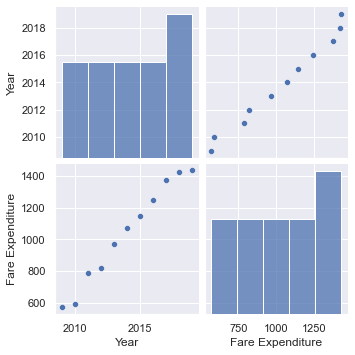

In [57]:
sns.pairplot(datacuatro)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1130.68 1148.  ]
 [ 682.29  590.  ]
 [1310.04 1377.  ]]


In [61]:
print('The precision of the model is ')
print(regressor.score(X_train, y_train))

The precision of the model is 
0.9882019364311317


In [62]:
print(regressor.predict([[2023]]))

[1848.11]


In [63]:
print(regressor.predict([[2024]]))

[1937.79]


In [64]:
print(regressor.predict([[2025]]))

[2027.46]
